In [2]:
# export
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = np.loadtxt('../code/week2.txt', delimiter=',')

## a.1

In [4]:
X1 = data[data[:, 2] == 1]
X2 = data[data[:, 2] == -1]

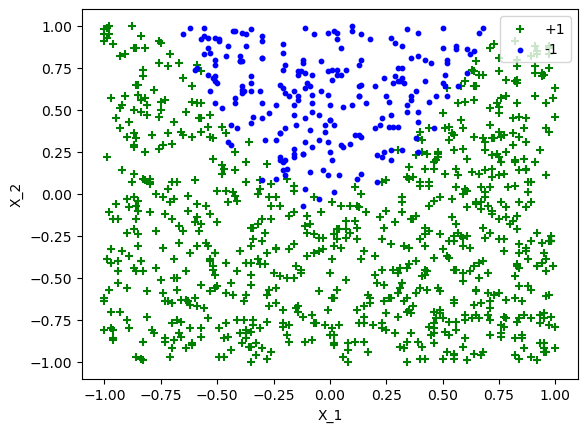

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], marker='+', color='green', label='+1')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue', s=10, label='-1')

plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend()

## a.2

In [6]:
X = data[:, :2]
Y = data[:, 2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [7]:
def get_2d(data, labels):
    positive = data[labels == 1]
    negative = data[labels == -1]

    plt.scatter(positive[:, 0], positive[:, 1], marker='+', color='green', label='+1 train')
    plt.scatter(negative[:, 0], negative[:, 1], marker='o', color='blue', s=10, label='-1 train')
    plt.xlabel("X_1")
    plt.ylabel("X_2")

In [8]:
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [9]:
print('y=' + str(model.coef_[0][0]) + ' * x1 + ' + str(model.coef_[0][1]) + ' * x2 + ' + str(model.intercept_[0]))

y=0.14896509273266464 * x1 + -4.026572337453222 * x2 + 2.187340355209176


## a.3

In [10]:
y_pred = model.predict(x_test)

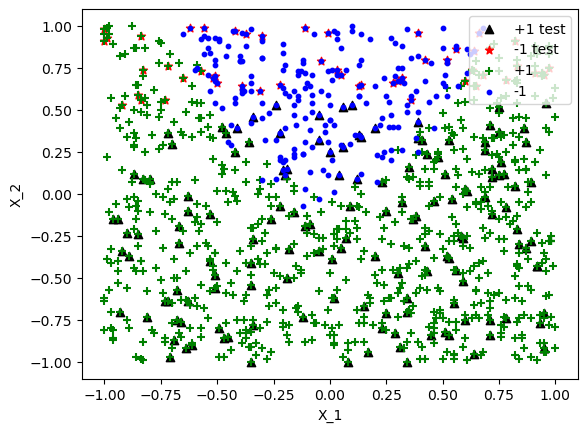

In [11]:
x_test_pos = x_test[y_pred == 1]
x_test_neg = x_test[y_pred == -1]
plt.scatter(x_test_pos[:, 0], x_test_pos[:, 1], marker='^', color='black', label='+1 test')
plt.scatter(x_test_neg[:, 0], x_test_neg[:, 1], marker='*', color='red', label='-1 test')
plt.scatter(X1[:, 0], X1[:, 1], marker='+', color='green', label='+1')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue', s=10, label='-1')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(loc=1)

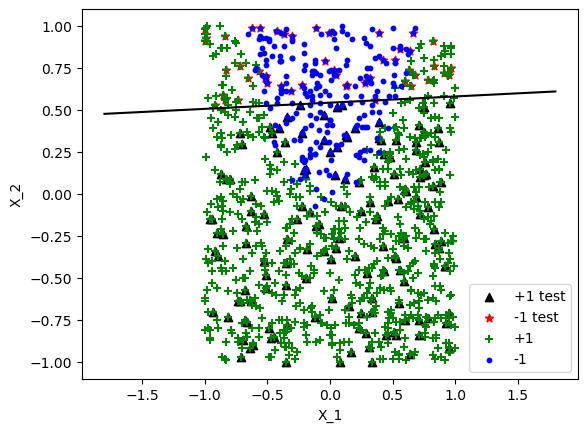

In [12]:
x_test_pos = x_test[y_pred == 1]
x_test_neg = x_test[y_pred == -1]
plt.scatter(x_test_pos[:, 0], x_test_pos[:, 1], marker='^', color='black', label='+1 test')
plt.scatter(x_test_neg[:, 0], x_test_neg[:, 1], marker='*', color='red', label='-1 test')
plt.scatter(X1[:, 0], X1[:, 1], marker='+', color='green', label='+1')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue', s=10, label='-1')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(loc=4)

def get_x2(x1, model):
    return (model.coef_[0][0] * x1 + model.intercept_) / - model.coef_[0][1]


dec_x1 = np.linspace(-1.8, 1.8, 100)
dec_x2 = get_x2(dec_x1, model)
plt.plot(dec_x1, dec_x2, color='black')
plt.show()

## b.1

In [13]:
from sklearn.svm import LinearSVC

In [14]:
model1 = LinearSVC(C=0.001).fit(x_train, y_train)
print('y=' + str(model1.coef_[0][0]) + ' * x1 + ' + str(model1.coef_[0][1]) + ' * x2 + ' + str(model1.intercept_[0]))

y=0.03780989920828067 * x1 + -0.30850979222152364 * x2 + 0.3223503386570537


In [15]:
model2 = LinearSVC(C=1).fit(x_train, y_train)
print('y=' + str(model2.coef_[0][0]) + ' * x1 + ' + str(model2.coef_[0][1]) + ' * x2 + ' + str(model2.intercept_[0]))

y=0.06006614031831001 * x1 + -1.35832302886774 * x2 + 0.7222555967193554


In [16]:
model3 = LinearSVC(C=100, max_iter=10000).fit(x_train, y_train)
print('y=' + str(model3.coef_[0][0]) + ' * x1 + ' + str(model3.coef_[0][1]) + ' * x2 + ' + str(model3.intercept_[0]))

y=0.06006308162251075 * x1 + -1.3741482992139349 * x2 + 0.7293321574219038


## b.2

In [17]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)

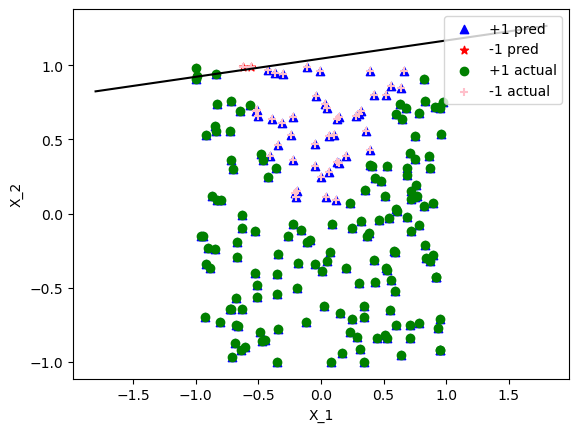

In [19]:
x_pos_1 = x_test[pred1 == 1]
x_neg_1 = x_test[pred1 == -1]
x_pos_test = x_test[y_test == 1]
x_neg_test = x_test[y_test == -1]

dec_x1_1 = np.linspace(-1.8, 1.8, 100)
dec_x2_1 = get_x2(dec_x1_1, model1)
plt.plot(dec_x1_1, dec_x2_1, color='black')

plt.scatter(x_pos_1[:, 0], x_pos_1[:, 1], marker='^', color='blue', label='+1 pred')
plt.scatter(x_neg_1[:, 0], x_neg_1[:, 1], marker='*', color='red', label='-1 pred')
plt.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='o', color='green', label='+1 actual')
plt.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='+', color='pink', label='-1 actual')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(loc=1)
plt.show()

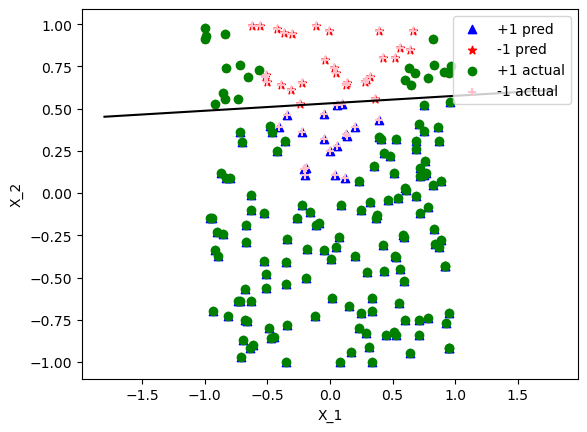

In [20]:
x_pos_2 = x_test[pred2 == 1]
x_neg_2 = x_test[pred2 == -1]
x_pos_test = x_test[y_test == 1]
x_neg_test = x_test[y_test == -1]

dec_x1_2 = np.linspace(-1.8, 1.8, 100)
dec_x2_2 = get_x2(dec_x1_2, model2)
plt.plot(dec_x1_2, dec_x2_2, color='black')

plt.scatter(x_pos_2[:, 0], x_pos_2[:, 1], marker='^', color='blue', label='+1 pred')
plt.scatter(x_neg_2[:, 0], x_neg_2[:, 1], marker='*', color='red', label='-1 pred')
plt.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='o', color='green', label='+1 actual')
plt.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='+', color='pink', label='-1 actual')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(loc=1)
plt.show()

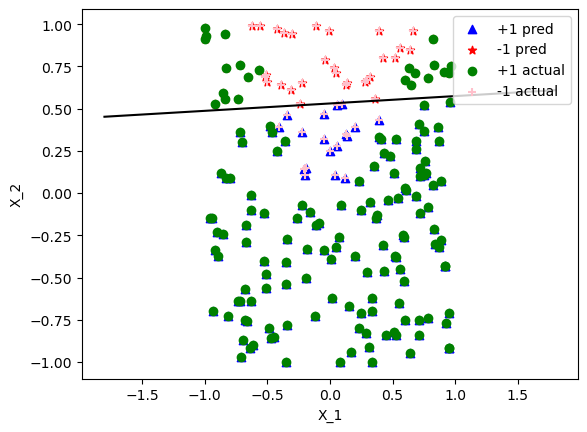

In [21]:
x_pos_3 = x_test[pred3 == 1]
x_neg_3 = x_test[pred3 == -1]
x_pos_test = x_test[y_test == 1]
x_neg_test = x_test[y_test == -1]

dec_x1_3 = np.linspace(-1.8, 1.8, 100)
dec_x2_3 = get_x2(dec_x1_3, model3)
plt.plot(dec_x1_3, dec_x2_3, color='black')

plt.scatter(x_pos_3[:, 0], x_pos_3[:, 1], marker='^', color='blue', label='+1 pred')
plt.scatter(x_neg_3[:, 0], x_neg_3[:, 1], marker='*', color='red', label='-1 pred')
plt.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='o', color='green', label='+1 actual')
plt.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='+', color='pink', label='-1 actual')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(loc=1)
plt.show()

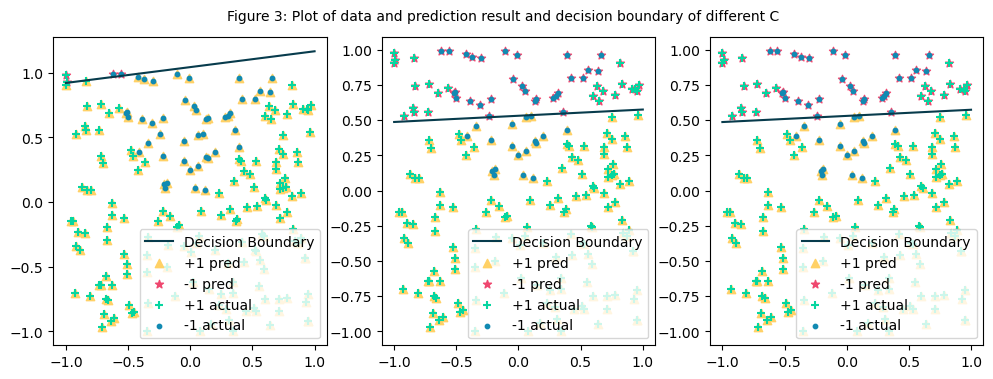

In [23]:

fig = plt.figure(figsize=(12, 4))

# Draw decision boundaries
ax1 = fig.add_subplot(1, 3, 1)
dec_x1_1 = np.linspace(-1.0, 1.0, 100)
dec_x2_1 = get_x2(dec_x1_1, model1)
ax1.plot(dec_x1_1, dec_x2_1, color='#073b4c', label='Decision Boundary')

x_pos_1 = x_test[pred1 == 1]
x_neg_1 = x_test[pred1 == -1]
ax1.scatter(x_pos_1[:, 0], x_pos_1[:, 1], marker='^', color='#FFD166', label='+1 pred')
ax1.scatter(x_neg_1[:, 0], x_neg_1[:, 1], marker='*', color='#EF476F', label='-1 pred')
ax1.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='+', color='#06D6A0', label='+1 actual')
ax1.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='o', color='#118ab2', s=10, label='-1 actual')
ax1.legend(loc=4)

# Draw decision boundaries
ax2 = fig.add_subplot(1, 3, 2)
dec_x1_2 = np.linspace(-1.0, 1.0, 100)
dec_x2_2 = get_x2(dec_x1_2, model2)
ax2.plot(dec_x1_2, dec_x2_2, color='#073b4c', label='Decision Boundary')

x_pos_2 = x_test[pred2 == 1]
x_neg_2 = x_test[pred2 == -1]
ax2.scatter(x_pos_2[:, 0], x_pos_2[:, 1], marker='^', color='#FFD166', label='+1 pred')
ax2.scatter(x_neg_2[:, 0], x_neg_2[:, 1], marker='*', color='#EF476F', label='-1 pred')
ax2.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='+', color='#06D6A0', label='+1 actual')
ax2.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='o', color='#118ab2', s=10, label='-1 actual')
ax2.legend(loc=4)

# Draw decision boundaries
ax3 = fig.add_subplot(1, 3, 3)
dec_x1_3 = np.linspace(-1.0, 1.0, 100)
dec_x2_3 = get_x2(dec_x1_3, model3)
ax3.plot(dec_x1_3, dec_x2_3, color='#073b4c', label='Decision Boundary')

x_pos_3 = x_test[pred3 == 1]
x_neg_3 = x_test[pred3 == -1]
ax3.scatter(x_pos_3[:, 0], x_pos_3[:, 1], marker='^', color='#FFD166', label='+1 pred')
ax3.scatter(x_neg_3[:, 0], x_neg_3[:, 1], marker='*', color='#EF476F', label='-1 pred')
ax3.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='+', color='#06D6A0', label='+1 actual')
ax3.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='o', color='#118ab2', s=10, label='-1 actual')
ax3.legend(loc=4)
plt.figtext(0.5, 0.95, 'Figure 3: Plot of data and prediction result and decision boundary of different C', ha='center', va='top')
plt.show()

## b.4

In [323]:
from sklearn.metrics import accuracy_score

score=accuracy_score(y_pred,y_test)
print(str(score))

0.79


In [326]:
score1=accuracy_score(pred1,y_test)
score2=accuracy_score(pred2,y_test)
score3=accuracy_score(pred3,y_test)
print(str(score1), str(score2), str(score3))

0.765 0.795 0.795


## c.1

In [232]:
x1 = x_train[:, 0]
x2 = x_train[:, 1]
new_data = np.insert(x_train, 2, values=x1 * x1, axis=1)
new_data = np.insert(new_data, 3, values=x2 * x2, axis=1)

In [233]:
print(new_data)

[[ 0.24    0.25    0.0576  0.0625]
 [ 0.12   -0.69    0.0144  0.4761]
 [-0.24    0.09    0.0576  0.0081]
 ...
 [ 0.92   -0.23    0.8464  0.0529]
 [-0.96   -0.87    0.9216  0.7569]
 [-0.96    0.89    0.9216  0.7921]]


In [234]:
new_X = new_data
new_Y = y_train

In [235]:
new_model = LogisticRegression(penalty='none', solver='lbfgs')
new_model.fit(new_X, new_Y)
print('y=' + str(new_model.coef_[0][0]) + ' * x1 + ' + str(new_model.coef_[0][1]) + ' * x2 + ' + str(new_model.coef_[0][2]) + ' * x1 * x1 + '  + str(new_model.coef_[0][3]) + ' * x2 * x2 + '+ str(new_model.intercept_[0]))

y=0.821596405374736 * x1 + -23.377935468663633 * x2 + 44.43655668582304 * x1 * x1 + 1.151730793076792 * x2 * x2 + -0.12973263619945047


## c.2

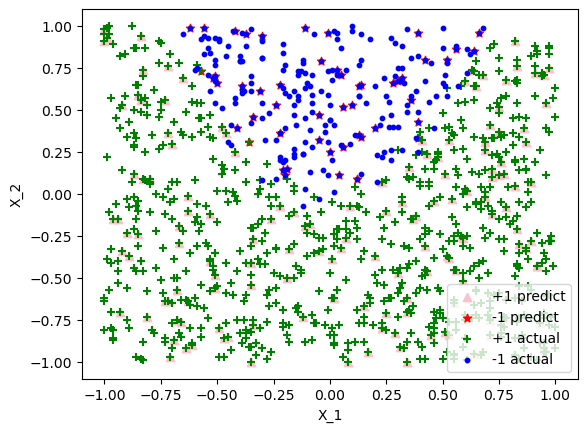

In [295]:
new_x_test = np.insert(x_test, 2, values=x_test[:,0]**2, axis=1)
new_x_test = np.insert(new_x_test, 3, values=x_test[:,1]**2, axis=1)

new_pred = new_model.predict(new_x_test)
x_new_pos = new_x_test[new_pred == 1]
x_new_neg = new_x_test[new_pred == -1]
plt.scatter(x_new_pos[:, 0], x_new_pos[:, 1], marker='^', color='pink', label='+1 predict')
plt.scatter(x_new_neg[:, 0], x_new_neg[:, 1], marker='*', color='red', label='-1 predict')
plt.scatter(X1[:, 0], X1[:, 1], marker='+', color='green', label='+1 actual')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue', s=10, label='-1 actual')
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend(loc=4)
plt.show()

In [248]:
new_score=accuracy_score(new_pred,y_test)
print(new_score)

0.985


## c.3

In [302]:
base_pred = np.ones(y_test.shape)

model_score=accuracy_score(new_pred,y_test)
base_score=accuracy_score(base_pred,y_test)

print(model_score, base_score)

0.985 0.765


## c.4

In [282]:
def plot_decision_boundary(model, data):
    x1=np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
    x2=np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
    x3=x1**2
    x4=x2**2
#     new_data = np.insert(x1, 1, values=x2, axis=1)
#     new_data = np.insert(new_data, 2, values=x3, axis=1)
#     new_data = np.insert(new_data, 3, values=x4, axis=1)
    x1, x2=np.meshgrid(x1, x2, x3, x4) #生成300x300个点
    z=np.c_[x1.ravel(), x2.ravel()] #按行拼接，规范成坐标点的格式

    print(z.shape)
#     y_pred = model.predict(new_data).reshape(x1.shape) #训练之后平铺
#     plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.brg)

In [283]:
plot_decision_boundary(new_model , new_data)

ValueError: too many values to unpack (expected 2)

In [313]:
history

import sys
sys.executable
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = data[:, :2]
Y = data[:, 2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('../code/week2.txt', delimiter=',')
data
X1 = data[data[:, 2] == 1]
X2 = data[data[:, 2] == -1]
plt.scatter(X1[:, 0], X1[:, 1], marker='+', color='green', label='+1')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue', s=10, label='-1')
import sys
sys.executable
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = data[:, :2]
Y = data[:, 2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(x_train, y_train)
print("intercept % f, slope % f" % (model.intercept_, model.coef_))
print("intercept % f, slope % f

In [1]:

fig = plt.figure(figsize=(12, 4))

# Draw decision boundaries
ax1 = fig.add_subplot(1, 3, 1)
dec_x1_1 = np.linspace(-1.0, 1.0, 100)
dec_x2_1 = get_x2(dec_x1_1, model1)
ax1.plot(dec_x1_1, dec_x2_1, color='#073b4c', label='Decision Boundary')

x_pos_1 = x_test[pred1 == 1]
x_neg_1 = x_test[pred1 == -1]
ax1.scatter(x_pos_1[:, 0], x_pos_1[:, 1], marker='^', color='#FFD166', label='+1 pred')
ax1.scatter(x_neg_1[:, 0], x_neg_1[:, 1], marker='*', color='#EF476F', label='-1 pred')
ax1.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='+', color='#06D6A0', label='+1 actual')
ax1.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='o', color='#118ab2', s=10, label='-1 actual')
ax1.legend(loc=4)

# Draw decision boundaries
ax2 = fig.add_subplot(1, 3, 2)
dec_x1_2 = np.linspace(-1.0, 1.0, 100)
dec_x2_2 = get_x2(dec_x1_2, model2)
ax2.plot(dec_x1_2, dec_x2_2, color='#073b4c', label='Decision Boundary')

x_pos_2 = x_test[pred2 == 1]
x_neg_2 = x_test[pred2 == -1]
ax2.scatter(x_pos_2[:, 0], x_pos_2[:, 1], marker='^', color='#FFD166', label='+1 pred')
ax2.scatter(x_neg_2[:, 0], x_neg_2[:, 1], marker='*', color='#EF476F', label='-1 pred')
ax2.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='+', color='#06D6A0', label='+1 actual')
ax2.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='o', color='#118ab2', s=10, label='-1 actual')
ax2.legend(loc=4)

# Draw decision boundaries
ax3 = fig.add_subplot(1, 3, 3)
dec_x1_3 = np.linspace(-1.0, 1.0, 100)
dec_x2_3 = get_x2(dec_x1_3, model3)
ax3.plot(dec_x1_3, dec_x2_3, color='#073b4c', label='Decision Boundary')

x_pos_3 = x_test[pred3 == 1]
x_neg_3 = x_test[pred3 == -1]
ax3.scatter(x_pos_3[:, 0], x_pos_3[:, 1], marker='^', color='#FFD166', label='+1 pred')
ax3.scatter(x_neg_3[:, 0], x_neg_3[:, 1], marker='*', color='#EF476F', label='-1 pred')
ax3.scatter(x_pos_test[:, 0], x_pos_test[:, 1], marker='+', color='#06D6A0', label='+1 actual')
ax3.scatter(x_neg_test[:, 0], x_neg_test[:, 1], marker='o', color='#118ab2', s=10, label='-1 actual')
ax3.legend(loc=4)
plt.figtext(0.5, 0.95, 'Figure 3: Plot of data and prediction result and decision boundary of different C', ha='center', va='top')
plt.show()

NameError: name 'plt' is not defined

In [2]:
temp_x1 = np.linspace(new_data[:, 0].min(), new_data[:, 0].max(), 100)
temp_x2 = np.linspace(new_data[:, 1].min(), new_data[:, 1].max(), 100)
z = np.zeros((100, 100))

for x_index, x in enumerate(temp_x1):
    for y_index, y in enumerate(temp_x2):
        temp = np.array([[x, y, x**2, y**2]])
        res = new_model.predict(temp)
        print(res)
        break
    break
#         z[x_index][y_index] = new_model.predict(temp)[0][0]
        
# plt.contour(temp_x1, temp_x2, z)

NameError: name 'np' is not defined